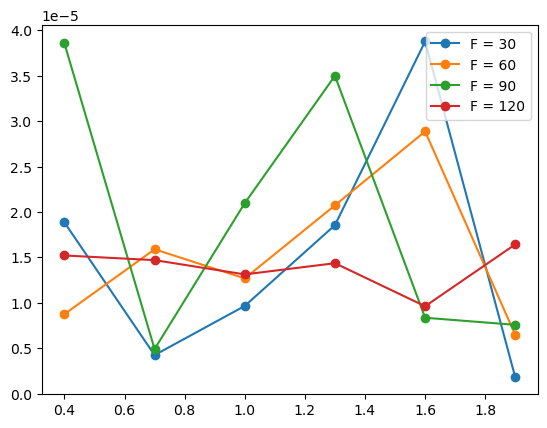

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

om_ext = [0.4, 0.7, 1.0, 1.3, 1.6, 1.9]   #외부 주파수
F = [30, 60, 90, 120]   #외부 힘
A_om = np.zeros(6)


dt = 1.e-7

for n in range(4):  #힘 인덱스
    for k in range(6):  #주파수 인덱스

        df = pd.read_csv(f'{F[n]}/C1Trace0000{k}.csv',sep=',',skiprows=50006)   #50006까지 데이터 스킵

        time = df.iloc[:,0]
        voltage = df.iloc[:,1]
        
        sumRE = 0
        sumIM = 0
        

        for i in range(50000):

            sumRE += dt * voltage[i] * np.cos(om_ext[k] * time[i])
            sumIM += dt * voltage[i] * np.sin(om_ext[k] * time[i])

        A_om[k] = np.sqrt(sumRE ** 2 + sumIM ** 2)  #주파수 반응 저장

    plt.plot(om_ext, A_om,marker='o', label=f'F = {F[n]}')
    plt.legend()
   